# Random Forest UK Accident Data 2012-2014

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get The Data

In [2]:
df = pd.read_csv('accidents_2012_to_2014.csv')
df.head()

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
Accident_Index                                 464697 non-null object
Location_Easting_OSGR                          464697 non-null int64
Location_Northing_OSGR                         464697 non-null int64
Longitude                                      464697 non-null float64
Latitude                                       464697 non-null float64
Police_Force                                   464697 non-null int64
Accident_Severity                              464697 non-null int64
Number_of_Vehicles                             464697 non-null int64
Number_of_Casualties                           464697 non-null int64
Date                                           464697 non-null object
Day_of_Week                                    464697 non-null int64
Time                                           464684 non-null object
Local_Authority_(District)                     464697 

In [4]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,464697.000000,4.646970e+05,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,464697.000000,0.0,464697.000000,464697.000000,464697.000000,464697.000000
mean,443834.284222,2.986258e+05,-1.375156,52.575498,28.504051,2.833461,1.828086,1.334420,4.108740,329.123829,4.070136,1012.728324,38.229793,NaN,2.786293,380.952317,1.337426,2012.928140
std,94098.865933,1.594701e+05,1.382137,1.436370,25.334899,0.402029,0.708703,0.821047,1.916429,259.222621,1.413850,1810.523701,13.800546,NaN,3.187084,1289.786824,0.472832,0.834536
min,65510.000000,1.029000e+04,-7.509162,49.912941,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2012.000000
25%,379059.000000,1.777100e+05,-2.315799,51.484841,6.000000,3.000000,1.000000,1.000000,2.000000,95.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2012.000000
50%,445539.000000,2.606800e+05,-1.323374,52.232169,22.000000,3.000000,2.000000,1.000000,4.000000,300.000000,3.000000,147.000000,30.000000,NaN,3.000000,0.000000,1.000000,2013.000000
75%,525350.000000,3.989590e+05,-0.192935,53.485973,45.000000,3.000000,2.000000,1.000000,6.000000,511.000000,6.000000,759.000000,40.000000,NaN,6.000000,0.000000,2.000000,2014.000000
max,655370.000000,1.190858e+06,1.759382,60.597984,98.000000,3.000000,67.000000,93.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,2.000000,2014.000000


### Selecting Features, Visualizing Data, and Cleaning Data

(0, 5)

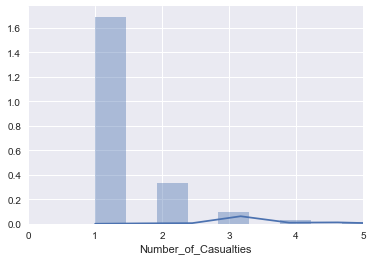

In [5]:
# check out the target variable
sns.distplot(df['Number_of_Casualties'],bins=200)
plt.xlim(0,5)

After looking at the casualties column we can see that the majority of accidents only have one casualty so we will use this to set the column to a binary variable

In [6]:
features = pd.DataFrame()

In [7]:
features = df[['Accident_Severity','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Road_Type','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area']]

In [8]:
features['mult_casualties'] = np.where(features['Number_of_Casualties'] > 1 , 1, 0)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


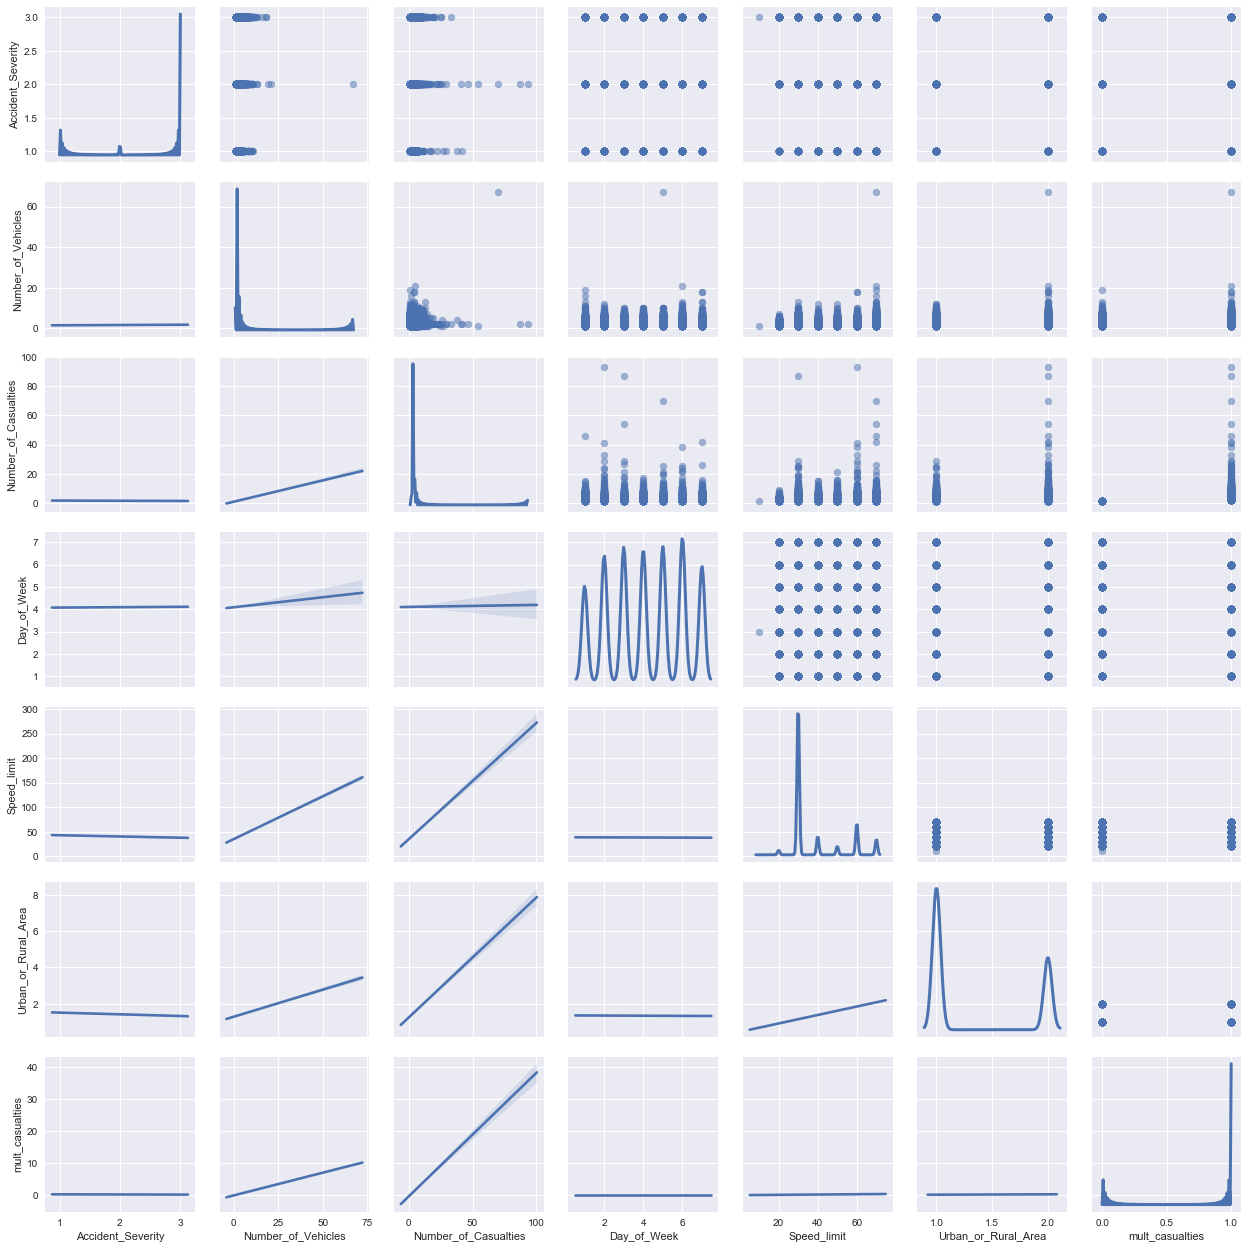

In [9]:
# creating a grid to see how columns interact with one another and their distribution
gd = sns.PairGrid(features.dropna(), diag_sharey=False)
gd.map_upper(plt.scatter, alpha=.5)
gd.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
gd.map_diag(sns.kdeplot, lw=3)

In [7]:
features.to_csv('2012-2014cd.csv')

In [8]:
X = features.drop(features[['mult_casualties','Number_of_Casualties']],axis=1)

In [9]:
X = pd.get_dummies(X)

In [10]:
Y = features['mult_casualties']

### Importing Libraries and Setting Up Model

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Applying pca

In [35]:
# scaling our X training data to prep for pca
ss = StandardScaler().fit_transform(X_train)

In [39]:
# using pca to select 3 components from X's features
sklearn_pca4 = PCA(n_components=3)

# fitting our x training data to pca
Y_sklearn4 = sklearn_pca.fit_transform(X_PCA3)

# adding results to a new data frame
X_PCA4 = pd.DataFrame(Y_sklearn4)

## Random Forest Model

In [17]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
cross_val_score(rfc.fit(X_PCA4,Y_train), X,Y, cv=10)

array([ 0.79440942,  0.79134926,  0.77146546,  0.77865289,  0.77815795,
        0.77503766,  0.77918612,  0.78189761,  0.7747961 ,  0.77615184])

## Random Forest Analysis After PCA

Our model didn't really improve much from PCA its scores were almost Identical to the first test. This could be do to the fact that this model already ran 100 instances of our first model.  Overall I would say that the slight increase in accuracy would not be worth it with this type of data.  A much larger dataset would just take a lot longer to work with, without returning much benefit for our model.